In [4]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [5]:
dataset = tf.data.Dataset.range(9)
dataset = dataset.batch(3)
print(list(dataset.as_numpy_iterator()))
size = (80,60)
pil_im = PIL.Image.open("./images/music_instruments_images/piano1.jpg") 
print(pil_im.size, size)
PIL.Image.open("./images/music_instruments_images/piano1.jpg") 
data_dir = pathlib.Path("./images/music_instruments_images")
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

[array([0, 1, 2], dtype=int64), array([3, 4, 5], dtype=int64), array([6, 7, 8], dtype=int64)]
(160, 120) (80, 60)
3243


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3
from tensorflow.keras.layers import Concatenate, GlobalAveragePooling2D
from tensorflow.keras.models import Model



# Load the dataset
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')


from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3
from tensorflow.keras.layers import Concatenate, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input

from tensorflow.keras.applications.vgg16 import VGG16

# Load the pre-trained model
pre_trained_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Freeze the pre-trained layers
for layer in pre_trained_model.layers:
    layer.trainable = False

# Create the model
model = Sequential()
model.add(pre_trained_model)
model.add(Flatten())
model.add(Dense(units = 256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 4, activation = 'softmax'))
print(model.summary())

# Compile the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fit the model to the data
history = model.fit(training_set,
                    epochs = 100 ,
                    validation_data = test_set)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_set, verbose=2)
print('\nTest accuracy:', test_acc)
music_model_arc = model.to_json()
model.save("music_model.h5")
print("Saved model to disk")


Found 1120 images belonging to 4 classes.
Found 333 images belonging to 4 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 2, 2, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               524544    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_______________________________________

C:\Users\bonqu\anaconda3\envs\tf\lib\site-packages\PIL\Image.py:997: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


35/35 [==============================] - 11s 316ms/step - loss: 1.4234 - accuracy: 0.3777 - val_loss: 1.1490 - val_accuracy: 0.5646
Epoch 2/100
35/35 [==============================] - 11s 311ms/step - loss: 1.1025 - accuracy: 0.5170 - val_loss: 0.9162 - val_accuracy: 0.6517
Epoch 3/100
35/35 [==============================] - 11s 314ms/step - loss: 0.9730 - accuracy: 0.5857 - val_loss: 0.7931 - val_accuracy: 0.6787
Epoch 4/100
35/35 [==============================] - 11s 307ms/step - loss: 0.8852 - accuracy: 0.6277 - val_loss: 0.6572 - val_accuracy: 0.7417
Epoch 5/100
35/35 [==============================] - 11s 310ms/step - loss: 0.8439 - accuracy: 0.6393 - val_loss: 0.7179 - val_accuracy: 0.6967
Epoch 6/100
35/35 [==============================] - 11s 320ms/step - loss: 0.8177 - accuracy: 0.6741 - val_loss: 0.5776 - val_accuracy: 0.7838
Epoch 7/100
35/35 [==============================] - 11s 304ms/step - loss: 0.7572 - accuracy: 0.7000 - val_loss: 0.6101 - val_accuracy: 0.7658
Epoc

This image most likely belongs to class: guitar
This image most likely belongs to guitar with a 40.46 percent confidence.


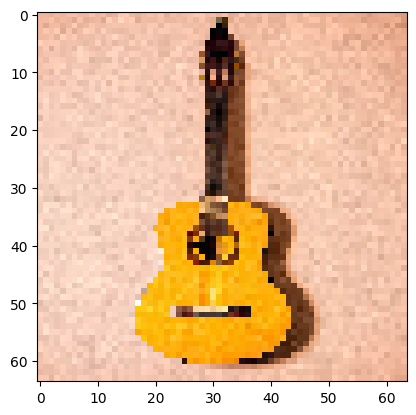

In [3]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.models import model_from_json
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


# Load the saved model
model = load_model("music_model.h5")
model_json = model.to_json()
with open("model1.json", "w") as json_file:
    json_file.write(model_json)



# Preprocess the image
img = tf.keras.preprocessing.image.load_img("./testimages/8.jpg", target_size=(64, 64))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
plt.imshow(img)
# Make predictions
predictions = model.predict(img_array,steps=1)

# Find the class with the highest confidence score
class_labels = {0: 'drum set', 1: 'guitar', 2: 'piano', 3: 'trumpet'}
class_idx = np.argmax(predictions[0])
class_label = class_labels[class_idx]



img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch


score = tf.nn.softmax(predictions)
# Print the result
print("This image most likely belongs to class:", class_label)
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions)
score1 = score.numpy()


print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_labels[np.argmax(score)], 100 * np.max(score))
)




In [ ]:
import io
import os
import sys 
import numpy as np
import tensorflow as tf
from PIL import Image
from flask import Flask, jsonify, request, render_template
import base64
app = Flask(__name__, template_folder = "./template")
@app.route('/', methods=['GET'])
def index():
     return render_template('submit_image.html')

def loadmodel():
    json_file = open('model1.json','r')
    loaded_model_json = json_file.read()
    json_file.close()

    #Load structure of model from json
    loaded_model = tf.keras.models.model_from_json(loaded_model_json)

    #Load weight from model.h5 file
    loaded_model.load_weights("music_model.h5")

    print("Loaded Model from disk")
    return loaded_model

def prepare_image(img):
    img = Image.open(io.BytesIO(img))
    img = img.convert("RGB")
    img = img.resize((28,28)) 
    img = np.array(img)
    print(img.shape)

    #reshape image into (28,28,1)
    img = img.reshape(28,28,1)
    print(img.shape)

    #convert array image data into tensor shape
    img = np.expand_dims(img, 0)

    return img

def predict_result(img):
    class_names =  {0: 'drum', 1: 'guitar', 2: 'piano', 3: 'trumpet'}
    model = loadmodel()
    rpredict = model.predict(img)
    return class_names[np.argmax(rpredict[0])]

@app.route('/predict', methods=['POST'])
def classify_image():
    if 'imagefile' not in request.files:
        return "Please try again. The Image doesn't exist"

    #Get the image file from request.files
    file = request.files.get('imagefile')

    if not file:
        return

    #Read image into bytes
    img_bytes = file.read()

    #Convert image bytes into base64 string
    img_string = base64.b64encode(img_bytes).decode()

    #Prepare image data
    img = prepare_image(img_bytes)
    #Classify the image data
    presult=predict_result(img)

    return render_template('submit_image.html', img_data=img_string), 200

if __name__ == '__main__':
    from werkzeug.serving import run_simple
    app.debug = True
    run_simple('localhost', 9000, app)

 * Running on http://localhost:9000
Press CTRL+C to quit
127.0.0.1 - - [05/Feb/2023 23:56:24] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [05/Feb/2023 23:56:24] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [05/Feb/2023 23:56:30] "POST /predict HTTP/1.1" 500 -
Error on request:
Traceback (most recent call last):
  File "C:\Users\bonqu\anaconda3\envs\tf\lib\site-packages\werkzeug\serving.py", line 335, in run_wsgi
    execute(self.server.app)
  File "C:\Users\bonqu\anaconda3\envs\tf\lib\site-packages\werkzeug\serving.py", line 322, in execute
    application_iter = app(environ, start_response)
  File "C:\Users\bonqu\anaconda3\envs\tf\lib\site-packages\flask\app.py", line 2548, in __call__
    return self.wsgi_app(environ, start_response)
  File "C:\Users\bonqu\anaconda3\envs\tf\lib\site-packages\flask\app.py", line 2528, in wsgi_app
    response = self.handle_exception(e)
  File "C:\Users\bonqu\anaconda3\envs\tf\lib\site-packages\flask\app.py", line 2525, in wsgi_app
    response = self.full

(28, 28, 3)


In [9]:
import flask
from flask import Flask, jsonify, request, render_template
from werkzeug.serving import run_simple

app = Flask(__name__, template_folder = "./template")

@app.route('/', methods=['GET'])
def index():
     return render_template('index.html')


if __name__ == 'main':
    app.debug = True
    run_simple('localhost', 9000, app)